# IMPORT LIBRARY

In [1]:
import pandas as pd #mengimport library pandas dan di inisialkan dengan pd
import numpy as np ##mengimport library numpy dan di inisialkan dengan np
import matplotlib.pyplot as plt 

# MEMBACA DATASET GIZI

In [2]:
data = pd.read_csv('gizi.csv') #membaca dataset
data #menampilkan dataset

,NO,NAMA BALITA,JENIS KELAMIN,UMUR BULAN/TAHUN,Berat,Tinggi,BMI
0,1,Adhe Fitri,P,24,5.8,0.650,13.73
1,2,Andi Hariati,P,24,5.5,0.590,15.80
2,3,Anwar Amir,L,28,6.7,0.715,13.11
3,4,Asmar,L,30,8.1,0.725,15.41
4,5,Eka Andriyani,P,28,6.9,0.730,12.95
...,...,...,...,...,...,...,...
495,496,Moza Rafasya,L,23,11.0,78.300,43.11
496,497,Amora Nauli,P,13,8.8,71.400,28.30
497,498,Arsenio,L,11,8.1,74.500,23.60
498,499,Shaqueena Nur,P,37,10.7,65.400,47.30


# MEMILIH DATA UNTUK ATRIBUT

In [3]:
data = data[["Berat","Tinggi"]] #memilih kolom berat dan tinggi untuk di proses
data.head(10) #menampilkan 10 data teratas

,Berat,Tinggi
0,5.8,0.650
1,5.5,0.590
2,6.7,0.715
3,8.1,0.725
4,6.9,0.730
5,5.8,0.770
6,4.7,0.525
7,6.8,0.540
8,3.5,0.550
9,5.8,0.530


# MELIHAT RINGKASAN STATISTIK

In [4]:
data.describe() #melihat ringkasan deskripsi data

,Berat,Tinggi
count,500.000000,500.000000
mean,9.096200,43.028960
std,2.010684,38.791533
min,1.000000,0.490000
25%,7.900000,0.760000
50%,9.000000,66.800000
75%,10.000000,77.800000
max,15.700000,104.500000


# PREPROCESSING DATA MENGGUNAKAN MINMAXSCALER

In [5]:
#melakukan normalisasi data karena rentang angkanya jauh
from sklearn import preprocessing  #disini menggunakan MinMaxScaler agar rentang angkanya 0-1
MM = preprocessing.MinMaxScaler().fit_transform(data)
data = pd.DataFrame(MM, columns = data.columns) #adalah tempat data yang sudah di normalisasi
data.head(15) #menampilkan 15 data teratas yang sudah di normalisasi

,Berat,Tinggi
0,0.326531,0.001538
1,0.306122,0.000961
2,0.387755,0.002163
3,0.482993,0.002259
4,0.401361,0.002307
5,0.326531,0.002692
6,0.251701,0.000337
7,0.394558,0.000481
8,0.170068,0.000577
9,0.326531,0.000385


# VISUALISASI PERSEBARAN DATA

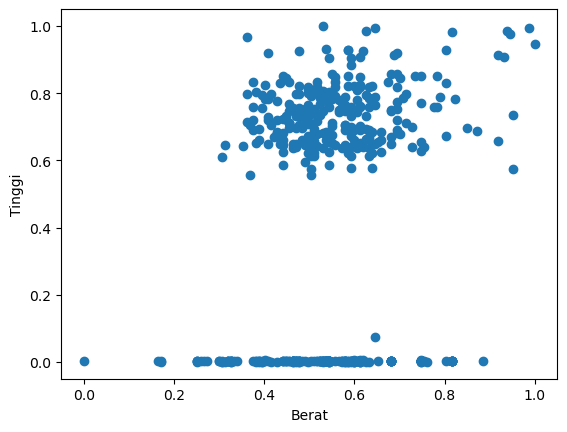

In [6]:
plt.scatter(data.Berat, data.Tinggi) 
plt.xlabel("Berat") #untuk memberikan label Berat pada bagian x
plt.ylabel("Tinggi") #untuk memberikan label Tinggi pada bagian y
plt.show() #perintah untuk menampilkan

# MEMBUAT MODEL

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init = 'auto') #disini menggunakan 3 cluster, randomstate ini supaya model kita saat mengenerate memilih centroid secara random dan tidal terjebak di local minimum
kmeans.fit(data) #proses pengclusteran

KMeans(n_clusters=3, n_init='auto', random_state=0)

# MELIHAT CLUSTER PUSAT

In [8]:
kmeans.cluster_centers_ #untuk melihat cluster pusat dari ke3 cluster

array([[0.50912642, 0.71480275],
       [0.53249514, 0.00259762],
       [0.71970951, 0.80435873]])

In [9]:
kmeans.labels_ #Hasil dari pengclusteran di atas menghasilkan labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0,

In [10]:
data['cluster'] = kmeans.labels_ #untuk menambahkan kolom cluster dan menampilkan hasil clusteringnya
data #menampilkan data keseluruhan

,Berat,Tinggi,cluster
0,0.326531,0.001538,1
1,0.306122,0.000961,1
2,0.387755,0.002163,1
3,0.482993,0.002259,1
4,0.401361,0.002307,1
...,...,...,...
495,0.680272,0.748101,2
496,0.530612,0.681761,0
497,0.482993,0.711566,0
498,0.659864,0.624075,0


In [11]:
data.head(10) #menampilkan 10 data teratas sesudah clustering

,Berat,Tinggi,cluster
0,0.326531,0.001538,1
1,0.306122,0.000961,1
2,0.387755,0.002163,1
3,0.482993,0.002259,1
4,0.401361,0.002307,1
5,0.326531,0.002692,1
6,0.251701,0.000337,1
7,0.394558,0.000481,1
8,0.170068,0.000577,1
9,0.326531,0.000385,1


In [12]:
data.tail(10) #menampilkan 10 data terakhir sesudah clustering

,Berat,Tinggi,cluster
490,0.639456,0.576964,0
491,0.510204,0.677916,0
492,0.496599,0.653879,0
493,0.462585,0.647149,0
494,0.598639,0.643304,0
495,0.680272,0.748101,2
496,0.530612,0.681761,0
497,0.482993,0.711566,0
498,0.659864,0.624075,0
499,0.605442,0.637535,0


In [13]:
data['cluster'].value_counts() #untuk melihat sebaran data pada kolom cluster

cluster
1    224
0    201
2     75
Name: count, dtype: int64

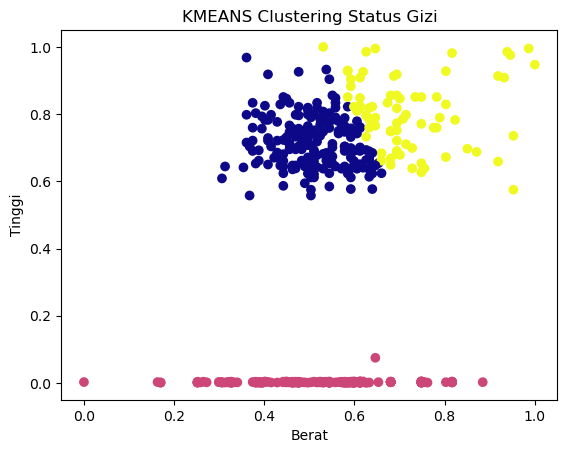

In [14]:
x_ = data['Berat'] #mengambbil data Berat yang diinisialisasikan dengan x_
y_ = data['Tinggi'] #mengambbil data Tinggi yang diinisialisasikan dengan y_
label = data['cluster'] ##mengambbil data Cluster yang diinisialisasikan dengan label
plt.title("KMEANS Clustering Status Gizi") #memberikan title KMEANS Clustering Status Gizi
plt.xlabel("Berat") #untuk memberikan label Berat pada sumbu x
plt.ylabel("Tinggi") #untuk memberikan label Tinggi pada sumbu y
plt.scatter(x_, y_, c = label, cmap='plasma') #membuat scatter plot dimana titik-titik data ditempatkan berdasarkan nilai x_ dan y_, dan diwarnai berdasarkan cluster dengan menggunakan colormap 'plasma'

# Cek sum of square error dari tiap pembagian jumlah cluster

In [15]:
#evaluasi 1
#sum of squared errors

sse = [] #Menyimpan sse ke dalam array
index = range(1,10) #membuat perulangan  dari 1 sampai 10
for i in index : #melakukan clustering dari 1 sampai 10
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init='auto') 
    kmeans.fit(data)
    sse_ = kmeans.inertia_ 
    sse.append(sse_)
    print (i,sse_)
    
    #bisa di lihat mulai dari 3 kebawah errornya semakin kecil

1 322.99419625158987
2 168.4775460053895
3 8.755407588272409
4 6.062917251804779
5 5.515368744357818
6 4.3056393116265985
7 3.4397603034268833
8 3.0144685128260273
9 2.5204205427840334


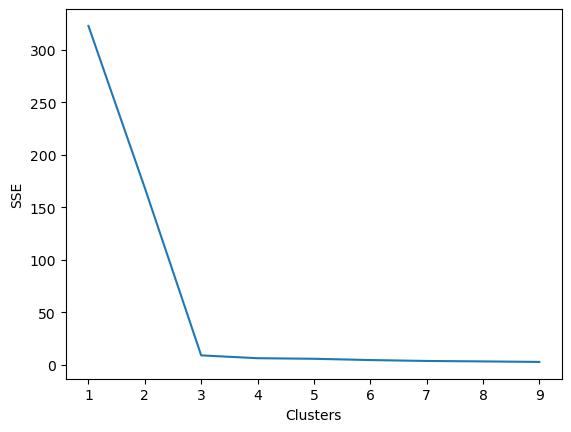

In [16]:
plt.plot(index, sse) #membuat visualisasi yang membantu penentuan jumlah cluster optimal
plt.xlabel('Clusters') #untuk memberikan label Clusters pada sumbu x
plt.ylabel('SSE') ##untuk memberikan label SSE pada sumbu Y
plt.show() #perintah untuk menampilkan gambar

# EVALUASI MODEL

In [17]:
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(data, labels)

0.7647431106675374

# IMPORT DATASET YG SUDAH DI NORMALISASI KE EXCEL

In [18]:
pwd

'C:\\Users\\USER\\Documents\\DESI\\SMSTR_5\\ML'

In [19]:
data.to_excel('datagizi.xlsx' , index=False, sheet_name='aye1')

In [20]:
#untuk membuat perhitungan manualnya import file yg sudah dinormalisasi pd excel